In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_dataset.csv')

### PreProcessing

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Number of survived people is:  342


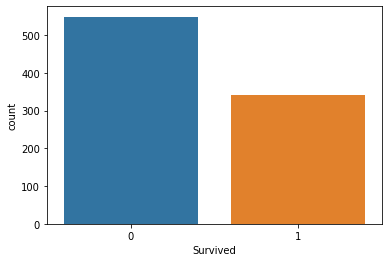

In [5]:
#survived people
sns.countplot(x='Survived',data=df)
survived=sum(df['Survived']==1)
print ('Number of survived people is: ', survived)

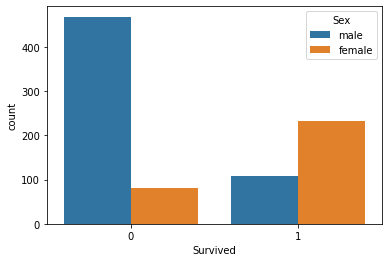

In [6]:
#relation between survived people and sex of the people survived
sns.countplot(x='Survived', hue='Sex', data=df)

##### Most survived people are females(nealry twice or more)

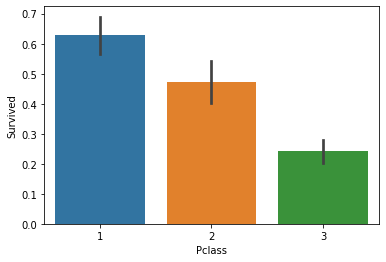

In [7]:
#survived - pclass relation
sns.barplot('Pclass','Survived', data=df)

([<matplotlib.axis.XTick at 0x1de072c3848>,
 <a list of 3 Text xticklabel objects>)

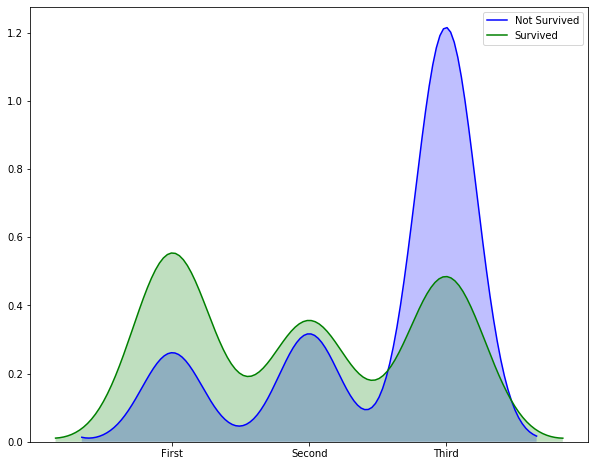

In [8]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='b',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

##### Most survived are in first class

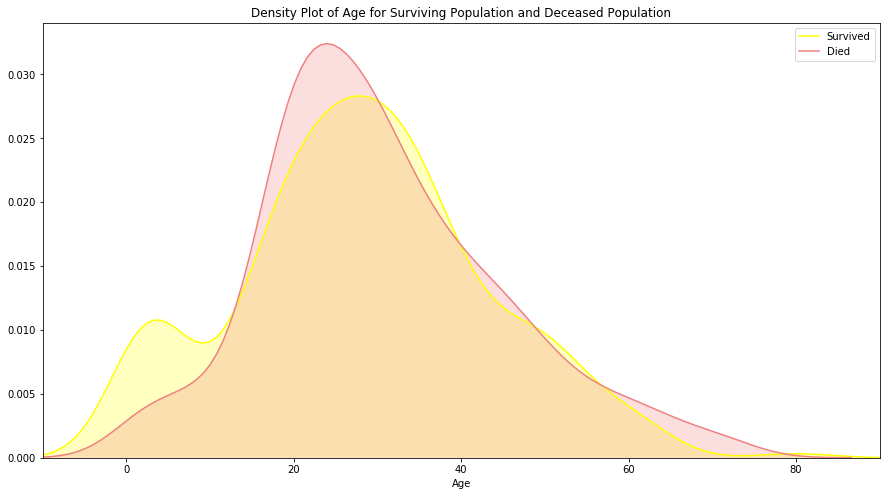

In [9]:
#Age with survival rate
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="yellow", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

#### Age distribution of survived and deceased is very similar. Large population of survivors were children

### Handling missing values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

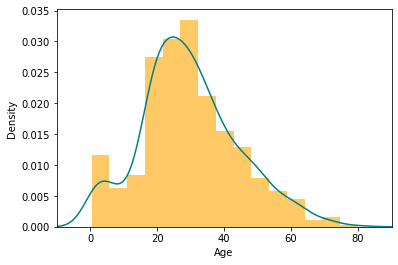

In [13]:
# age missing value handling
agex = df["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
agex.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

#### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this,we can use the median to impute the missing values.

In [14]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [15]:
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Embarked missing value
print('Percent of missing Embarked records is %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing Embarked records is 0.22%


In [18]:
#since it is categorical (and sex too - so can get its dummy if using), will fill it with dummy vrbls
embark=pd.get_dummies(df.Embarked, drop_first=True)
df=pd.concat([df,embark], axis=1)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Q                0
S                0
dtype: int64

In [20]:
#since not using cabin variable for model creation, can drop it
df.drop('Cabin', inplace=True, axis=1)
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Q              0
S              0
dtype: int64

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [23]:
#drop col that are not relevant/using
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,Parch,Fare,Q,S
0,0,3,22.0,0,7.2500,0,1
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,0,1
3,1,1,35.0,0,53.1000,0,1
4,0,3,35.0,0,8.0500,0,1


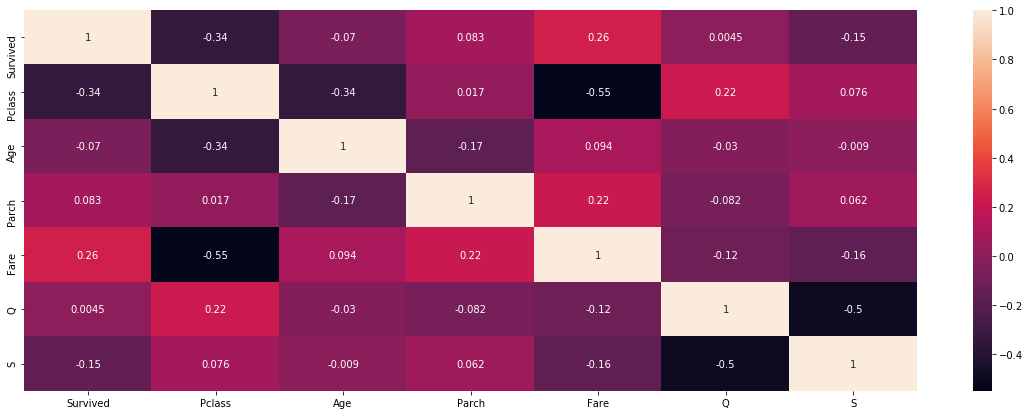

In [25]:
#correlation heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

#### Data splitting

In [26]:
X=df.drop('Survived',axis=1)
y=df.Survived

### kNN Model and SVM Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [30]:
# create kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# create SVM model
svm_model = SVC(kernel='linear', C=1, gamma='auto')

In [31]:
# k-fold cross-validation for kNN model
kfold_validator = KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_model, X, y, cv=kfold_validator)
knn_scores

array([0.65730337, 0.6741573 , 0.69101124, 0.74157303, 0.66666667])

In [33]:
knn_avg_score = knn_scores.mean()
print('kNN average accuracy score (k-fold):', knn_avg_score)

kNN average accuracy score (k-fold): 0.6861423220973782


In [36]:
#stratified k-fold cross-validation for kNN model
skf_validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_scores_skf = cross_val_score(knn_model, X, y, cv=skf_validator)
print('kNN average accuracy score (stratified k-fold):', np.mean(knn_scores_skf))

kNN average accuracy score (stratified k-fold): 0.6614422649654035


In [37]:
# k-fold cross-validation for svm model
svm_scores = cross_val_score(svm_model, X, y, cv=kfold_validator)
print('SVM model validator score(k-fold): ',svm_scores)
print('\n')
print('SVM average accuracy score (k-fold):', np.mean(svm_scores))

SVM model validator score(k-fold):  [0.73033708 0.67977528 0.71910112 0.70786517 0.67231638]


SVM average accuracy score (k-fold): 0.7018790071732368


In [39]:
# stratified k-fold cross-validation for svm model
svm_scores_skf = cross_val_score(svm_model, X, y, cv=skf_validator)
print('SVM model validator scores(stratified k-fold): ',svm_scores_skf)
print('\n')
print('SVM average accuracy score (stratified k-fold):', np.mean(svm_scores_skf))

SVM model validator scores(stratified k-fold):  [0.69101124 0.69662921 0.69101124 0.75280899 0.72316384]


SVM average accuracy score (stratified k-fold): 0.7109249031930426


### kNN Average Accuracy Score(k-fold): 0.6861423220973782 (~ 0.69)
### kNN Average Accuracy Score(stratified k-fold): 0.6614422649654035(~ 0.66) 
### SVM Average Accuracy Score(k-fold): 0.7018790071732368 (~ 0.702)
### SVM Average Accuracy Score(stratified k-fold): 0.7109249031930426 (~ 0.711)